In [ ]:
from typing import TypedDict

class BMState(TypedDict):
    #input Fields
    runs:int
    balls:int
    fours:int
    sixes:int

    #Calculated Fields
    STR:float
    ballsPB:float
    boundary_per:float

    #Summary Field
    summary:str

In [33]:
# Strike Rate

def StrikeRate(state:BMState) -> BMState:

    STR=(state["runs"]/(state['balls'])) * 100

    return {"STR":STR} #Partial Update and you can not full update in the parallel workflow

    #update complete state (the STR) You can Face the error
    # state["STR"]=STR
    # return state 
    """If you return direct the State then you will return this error 
       InvalidUpdateError: At key 'runs': Can receive only one value per step.
      Use an Annotated key to handle multiple values."""

In [34]:
#Calculate the balls per boundry

def bpb(state:BMState)-> BMState:
    bpb=(state['balls']) / ((state["fours"]) + (state["sixes"]))

    return {"ballsPB":bpb}

In [35]:
#Calcualte the boundary percentage

def boundry_percentage(state:BMState) -> BMState:
    percentage =(((state["fours"] * 4) + (state["sixes"]*6))/(state["runs"])) * 100

#Partital update
    return {"boundary_per":percentage}

In [36]:
#Generate the summary

def summary(state:BMState) -> BMState:

    summary=f"""
        Total Runs {state["runs"]}
        Total Balls Played {state["balls"]}
        Totlal Runs {state['runs']} 
        Total Fours(4s) {state['fours']}  
        Total Sixes(6s) {state['sixes']} 
        Strike Rate {round(state["STR"],2)} 
        Boundry per ball {round(state["ballsPB"],2)} 
        Boundry percentage {round(state["boundary_per"],2)} %
            
            """
    #Partial update the state
    return {"summary":summary}


In [37]:
from langgraph.graph import StateGraph,START,END

workflow=StateGraph(BMState)

In [38]:
# Add the nodes 
workflow.add_node("StrikeRate",StrikeRate)
workflow.add_node("BallPerBoundry",bpb)
workflow.add_node("BoundryPercentage",boundry_percentage)
workflow.add_node("Summary",summary)

# Add the edges
workflow.add_edge(START,"StrikeRate")
workflow.add_edge(START,"BallPerBoundry")
workflow.add_edge(START,"BoundryPercentage")

workflow.add_edge("StrikeRate","Summary")
workflow.add_edge("BallPerBoundry","Summary")
workflow.add_edge("BoundryPercentage","Summary")

workflow.add_edge("Summary",END)

# Compile the workflow
graph =workflow.compile()

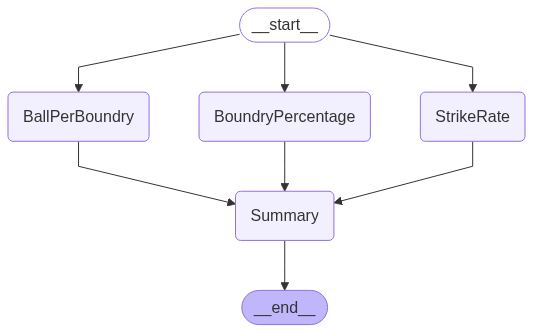

In [39]:
graph

In [40]:
#Execute the Graph

inputs ={"runs":100,
         "balls":50,
         "fours":4,
         "sixes":6}

result = graph.invoke(inputs)

In [41]:
print(result["summary"])


        Total Runs 100
        Total Balls Played 50
        Totlal Runs 100 
        Total Fours(4s) 4  
        Total Sixes(6s) 6 
        Strike Rate 200.0 
        Boundry per ball 5.0 
        Boundry percentage 52.0 %
            
            
